# Pauta Tarea 3

Comenzamos importando las librerías que usaremos en el dearrollo de esta tarea. 

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

Primero, importamos los datos de una tabla excel en que se reunen los del sitio del ministerio. C

**Observación: Como las cifras de muertes comienzan a darse recién desde el 15 de marzo, se borraron las semanas anteriores a esa fecha**

## Pregunta 1

In [2]:
matriz= pd.read_excel("data.xlsx", header=None)
matriz.head()

,0,1,2,3,4
0,NaN,Activos,Recuperados,Fallecidos,Recuperados + Fallecidos
1,22-Feb,1,0,0,0
2,15-Mar,726,55,0,55
3,16-Mar,979,77,0,77
4,17-Mar,1215,90,0,90


Extraemos ahora las columnas que nos interesan (solo los valores numéricos)

In [3]:
Infectados = np.array(matriz[1][1:],dtype=int)
Recuperados = np.array(matriz[4][1:],dtype=int)
Susceptibles = 19000000 - Recuperados-Infectados

#display(Susceptibles)
#display(Infectados)
#display(Recuperados)

In [4]:
n = len(Infectados) # Guardamos el número total de datos

Finalmente, guardamos los valores cada 7 días

In [5]:
SusceptiblesSemanal = Susceptibles[range(0,n,7)]
InfectadosSemanal = Infectados[range(0,n,7)] 
RecuperadosSemanal = Recuperados[range(0,n,7)]

#display(SusceptiblesSemanal)
#display(InfectadosSemanal)
#display(RecuperadosSemanal)

**Observación: se tiene un total de 35 semanas**

In [6]:
len(SusceptiblesSemanal)

35

## Pregunta 2

Tenemos el siguiente sistema dinámico lineal:

$$ \left\{\begin{array}{rl} 
S_n &= P_{ss} S_{n-1}\\
I_n &= P_{si} S_{n-1} + P_{ii} I_{n-1}\\
R_n &= P_{ir} I_{n-1} + R_{n-1}
\end{array}\right.$$

Donde 
* $P_{ss}$ es la probabilidad de ser susceptible y seguir siendolo en la semana siguiente
* $P_{si}$ es la probabilidad de ser susceptible y ser infectado en la semana siguiente, que vale $1 - P_{ss}$.
* $P_{ii}$ es la probabilidad de ser infectado y seguir siendolo en la semana siguiente
* $P_{ir}$ es la probabilidad de ser infectado y ser recuperado en la semana siguiente, que vale $1 - P_{ii}$.

En forma matricial, obtenemos que la matriz de probabilidades es:

$$P = \left( \begin{array}{ccc}P_{ss} &0 & 0 \\ P_{si} & P_{ii} & 0 \\ 0 & P_{ir} & 1 \end{array}\right)$$


In [7]:
Pss = SusceptiblesSemanal[2]/SusceptiblesSemanal[1]
Psi = 1-Pss
display(Pss)
display(Psi)

0.9998790893665914

0.00012091063340857744

In [8]:
Pir = (RecuperadosSemanal[2]-RecuperadosSemanal[1])/InfectadosSemanal[1]
Pii = 1-Pir
display(Pii)
display(Pir)

0.5244170699516058

0.4755829300483942

In [9]:
P = np.array([[Pss,0,0],[Psi,Pii,0],[0,Pir,1]])
display(P)

array([[9.99879089e-01, 0.00000000e+00, 0.00000000e+00],
       [1.20910633e-04, 5.24417070e-01, 0.00000000e+00],
       [0.00000000e+00, 4.75582930e-01, 1.00000000e+00]])

## Pregunta 3

Calculamos primero los valores semanales dados por el modelo. 

In [10]:
V0 = [19000000, 1, 0]

SusceptiblesModelo = [np.dot(np.linalg.matrix_power(P,i),V0)[0] for i in range(35)]
InfectadosModelo   = [np.dot(np.linalg.matrix_power(P,i),V0)[1] for i in range(35)]
RecuperadosModelo  = [np.dot(np.linalg.matrix_power(P,i),V0)[2] for i in range(35)]

Y comparamos gráficamente con los datos reales.

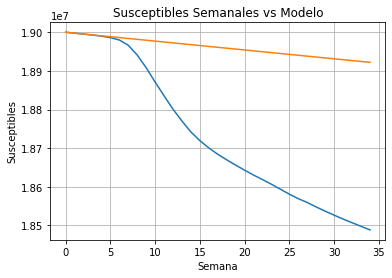

In [11]:
fig, ax = plt.subplots()

ax.plot(range(35), SusceptiblesSemanal)
ax.plot(range(35), SusceptiblesModelo)

ax.set(xlabel='Semana', ylabel='Susceptibles',
       title='Susceptibles Semanales vs Modelo')
ax.grid()

plt.show()

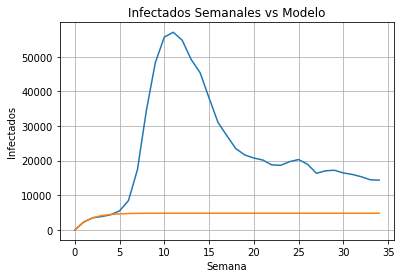

In [12]:
fig, ax = plt.subplots()

ax.plot(range(35), InfectadosSemanal)
ax.plot(range(35), InfectadosModelo)

ax.set(xlabel='Semana', ylabel='Infectados',
       title='Infectados Semanales vs Modelo')
ax.grid()

plt.show()

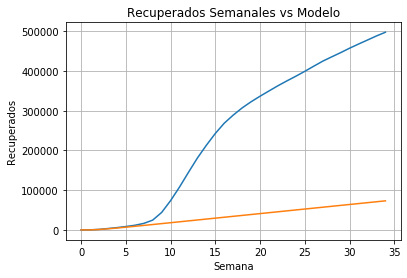

In [13]:
fig, ax = plt.subplots()

ax.plot(range(35), RecuperadosSemanal)
ax.plot(range(35), RecuperadosModelo)

ax.set(xlabel='Semana', ylabel='Recuperados',
       title='Recuperados Semanales vs Modelo')
ax.grid()

plt.show()

Vemos que el modelo predice bien las primeras 5 semanas, y luego las curvas se diferencian bastante. 

## Pregunta 4 y 5

Como mejora, podemos recuperar las matrices de probabilidades cada 5 semanas 

In [14]:
V = [19000000, 1, 0]
SusceptiblesModelo2 = [V[0]]
InfectadosModelo2 = [V[1]]
RecuperadosModelo2 = [V[2]]

for k in range(7):
    Pss = SusceptiblesSemanal[5*k+2]/SusceptiblesSemanal[5*k+1]
    Psi = 1-Pss
    Pir = (RecuperadosSemanal[5*k+2]-RecuperadosSemanal[5*k+1])/InfectadosSemanal[5*k+1]
    Pii = 1-Pir
    P   = np.array([[Pss,0,0],[Psi,Pii,0],[0,Pir,1]])

    V   = [SusceptiblesModelo2[-1], InfectadosModelo2[-1], RecuperadosModelo2[-1]]

    #SusceptiblesTemp = [np.dot(np.linalg.matrix_power(P,i),V)[0] for i in range(5*k, 5*(k+1))]
    #InfectadosTemp   = [np.dot(np.linalg.matrix_power(P,i),V)[1] for i in range(5*k, 5*(k+1))]
    #RecuperadosTemp  = [np.dot(np.linalg.matrix_power(P,i),V)[2] for i in range(5*k, 5*(k+1))]
    
    SusceptiblesTemp = [np.dot(np.linalg.matrix_power(P,i),V)[0] for i in range(1,6)]
    InfectadosTemp   = [np.dot(np.linalg.matrix_power(P,i),V)[1] for i in range(1,6)]
    RecuperadosTemp  = [np.dot(np.linalg.matrix_power(P,i),V)[2] for i in range(1,6)]
    
    SusceptiblesModelo2 = np.append(SusceptiblesModelo2,SusceptiblesTemp)
    InfectadosModelo2   = np.append(InfectadosModelo2,InfectadosTemp)
    RecuperadosModelo2  = np.append(RecuperadosModelo2,RecuperadosTemp)

Graficamos los resultados

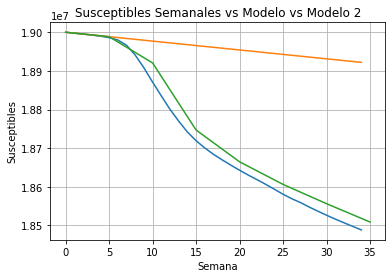

In [15]:
fig, ax = plt.subplots()

ax.plot(range(35), SusceptiblesSemanal)
ax.plot(range(35), SusceptiblesModelo)
ax.plot(range(len(SusceptiblesModelo2)), SusceptiblesModelo2)

ax.set(xlabel='Semana', ylabel='Susceptibles',
       title='Susceptibles Semanales vs Modelo vs Modelo 2')
ax.grid()

plt.show()

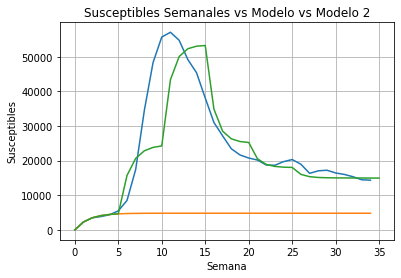

In [16]:
fig, ax = plt.subplots()

ax.plot(range(35), InfectadosSemanal)
ax.plot(range(35), InfectadosModelo)
ax.plot(range(len(InfectadosModelo2)), InfectadosModelo2)

ax.set(xlabel='Semana', ylabel='Susceptibles',
       title='Susceptibles Semanales vs Modelo vs Modelo 2')
ax.grid()

plt.show()

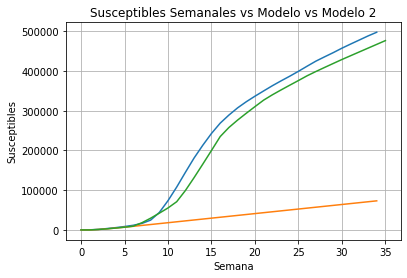

In [17]:
fig, ax = plt.subplots()

ax.plot(range(35), RecuperadosSemanal)
ax.plot(range(35), RecuperadosModelo)
ax.plot(range(len(RecuperadosModelo2)), RecuperadosModelo2)

ax.set(xlabel='Semana', ylabel='Susceptibles',
       title='Susceptibles Semanales vs Modelo vs Modelo 2')
ax.grid()

plt.show()

Vemos que el nuevo modelo aproxima mejor el comportamiento de la pandemia. 

## Pregunta 6

El modelo muestra que la pandemia toma mucho tiempo en estar controlada, por ejemplo, calculemos el tiempo que demora el sistema en tener menos de 100 infectados:

In [18]:
V = [SusceptiblesModelo2[-1], InfectadosModelo2[-1], RecuperadosModelo2[-1]]
i = 0
umbral = V[0]
while(umbral>100):
    i+=1
    umbral = np.dot(np.linalg.matrix_power(P,i),V)[1]
display(i)

9773

Luego de aproximadamente 9773 semanas, es decir, aproximadamente 180 años. 